In [3]:
# 📦 Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import numpy as np

In [21]:
# 📂 Cargar el dataset
df = pd.read_csv('data/monedas_completas.csv')

## 1️⃣ Describe Data – Descripción inicial del dataset

In [23]:
display(df.head())

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,aave-polygon-aave,amaave,Aave Polygon AAVE,https://coin-images.coingecko.com/coins/images...,2.662300e+02,0.0,NaN,858696.00,0.00,268.150000,...,3.225345e+03,NaN,470.810000,-43.59833,2021-09-03T16:00:33.816Z,4.605000e+01,476.69651,2022-06-18T21:00:55.939Z,NaN,2025-07-02T14:40:02.320Z
1,3-kingdoms-multiverse,3km,3 Kingdoms Multiverse,https://coin-images.coingecko.com/coins/images...,8.910000e-06,0.0,NaN,89124.00,6664.30,NaN,...,1.000000e+10,1.000000e+10,0.072532,-99.98771,2023-03-30T07:38:28.876Z,6.520000e-06,36.65055,2025-06-05T05:36:28.696Z,NaN,2025-06-05T22:31:47.174Z
2,advanced-united-continent,auc,Advanced United Continent,https://coin-images.coingecko.com/coins/images...,3.142800e-04,0.0,NaN,1879806.00,161306.00,0.000314,...,6.000000e+09,NaN,49.930000,-99.99937,2022-05-06T23:09:08.473Z,1.057300e-04,197.24611,2025-06-16T04:24:37.246Z,NaN,2025-07-02T14:40:52.749Z
3,ageofgods,aog,AgeOfGods,https://coin-images.coingecko.com/coins/images...,1.456530e-03,0.0,NaN,393256.00,215564.00,0.001480,...,2.700000e+08,2.700000e+08,1.120000,-99.86978,2022-01-05T18:10:31.864Z,1.357470e-03,7.29215,2025-05-06T14:10:00.403Z,NaN,2025-07-02T14:40:39.690Z
4,airbtc,airbtc,AirBTC,https://coin-images.coingecko.com/coins/images...,7.909100e-08,0.0,NaN,16609.06,16.73,NaN,...,2.100000e+11,2.100000e+11,0.000013,-99.38716,2024-06-12T12:38:20.387Z,4.979900e-08,58.82066,2025-03-01T11:00:10.721Z,NaN,2025-07-01T08:58:17.135Z


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                5000 non-null   object 
 1   symbol                            4999 non-null   object 
 2   name                              5000 non-null   object 
 3   image                             5000 non-null   object 
 4   current_price                     4995 non-null   float64
 5   market_cap                        5000 non-null   float64
 6   market_cap_rank                   0 non-null      float64
 7   fully_diluted_valuation           4641 non-null   float64
 8   total_volume                      5000 non-null   float64
 9   high_24h                          3683 non-null   float64
 10  low_24h                           3683 non-null   float64
 11  price_change_24h                  3683 non-null   float64
 12  price_

In [25]:
print(df.describe(include='all'))

              id symbol  name              image  current_price  market_cap  \
count       5000   4999  5000               5000   4.995000e+03      5000.0   
unique      3176   2818  3160               3152            NaN         NaN   
top     aave-zrx   weth   AMC  missing_large.png            NaN         NaN   
freq           5     17     8                 37            NaN         NaN   
mean         NaN    NaN   NaN                NaN   9.641188e+10         0.0   
std          NaN    NaN   NaN                NaN   3.405822e+12         0.0   
min          NaN    NaN   NaN                NaN   0.000000e+00         0.0   
25%          NaN    NaN   NaN                NaN   2.061000e-05         0.0   
50%          NaN    NaN   NaN                NaN   1.000160e-03         0.0   
75%          NaN    NaN   NaN                NaN   1.814850e-01         0.0   
max          NaN    NaN   NaN                NaN   1.203899e+14         0.0   

        market_cap_rank  fully_diluted_valuation  t

## 2️⃣ Verify Data Quality – Calidad de datos

In [26]:
# Revisión de valores nulos
print(df.isna().sum().sort_values(ascending=False))

market_cap_rank                     5000
roi                                 4970
max_supply                          2079
price_change_percentage_24h         1317
low_24h                             1317
price_change_24h                    1317
high_24h                            1317
market_cap_change_24h               1316
market_cap_change_percentage_24h    1316
fully_diluted_valuation              359
total_supply                         320
current_price                          5
atl_date                               2
ath                                    2
atl                                    2
ath_date                               2
atl_change_percentage                  1
symbol                                 1
ath_change_percentage                  1
total_volume                           0
image                                  0
market_cap                             0
id                                     0
name                                   0
circulating_supp

In [27]:
# Revisión de duplicados
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 1405


In [28]:
# Porcentaje de valores nulos por columna
null_percent = df.isna().mean() * 100
print(null_percent.sort_values(ascending=False))

market_cap_rank                     100.00
roi                                  99.40
max_supply                           41.58
price_change_percentage_24h          26.34
low_24h                              26.34
price_change_24h                     26.34
high_24h                             26.34
market_cap_change_24h                26.32
market_cap_change_percentage_24h     26.32
fully_diluted_valuation               7.18
total_supply                          6.40
current_price                         0.10
atl_date                              0.04
ath                                   0.04
atl                                   0.04
ath_date                              0.04
atl_change_percentage                 0.02
symbol                                0.02
ath_change_percentage                 0.02
total_volume                          0.00
image                                 0.00
market_cap                            0.00
id                                    0.00
name       

In [29]:
# Columnas con un solo valor único (sin variabilidad)
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Columna sin variabilidad: {col} -> {df[col].unique()[0]}")

Columna sin variabilidad: market_cap -> 0.0


## 3️⃣ Explore Data – Exploración visual (solo columnas numéricas sin muchos nulos)

In [30]:
# Filtrar columnas numéricas con buena cobertura (menos del 30% de nulos)
num_cols = df.select_dtypes(include='number').columns
cols_con_pocos_nulos = [col for col in num_cols if df[col].isna().mean() < 0.3]

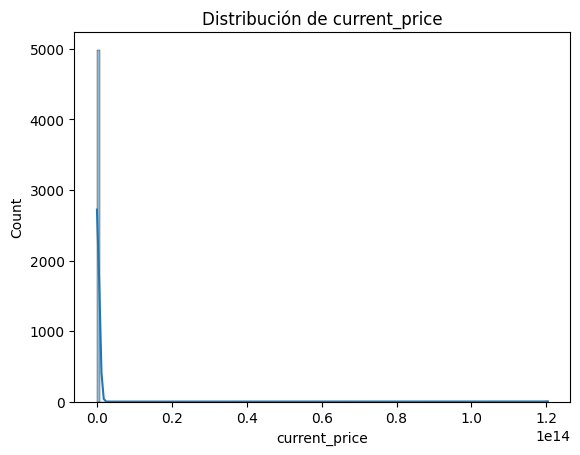

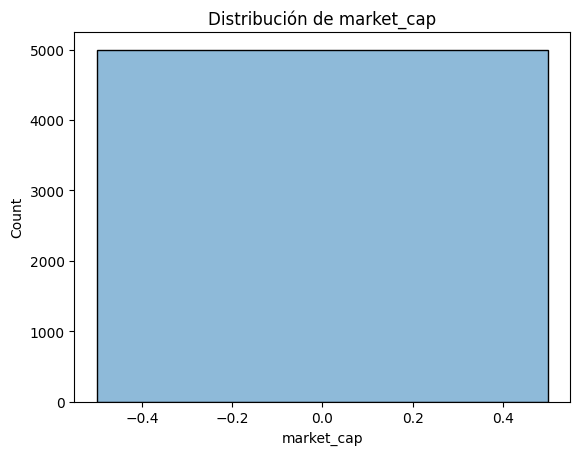

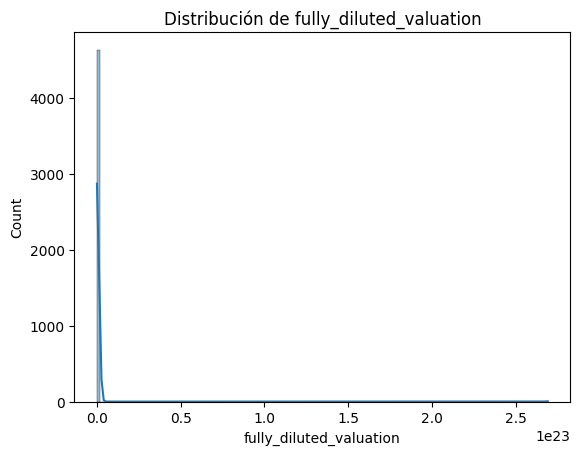

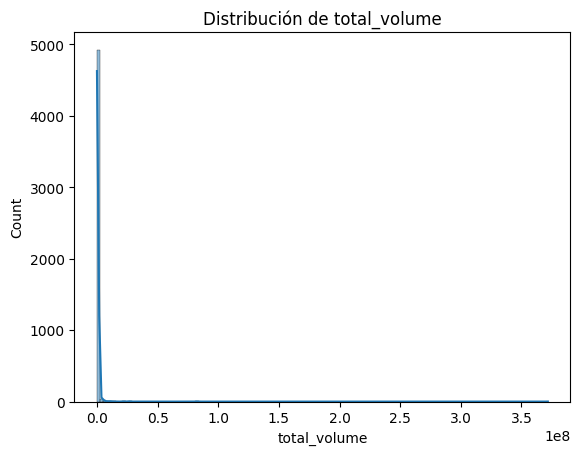

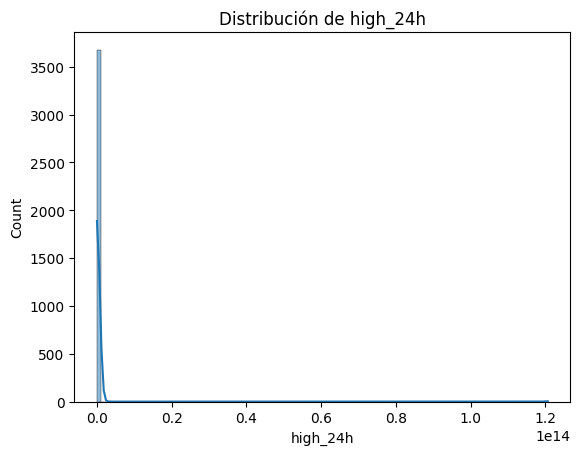

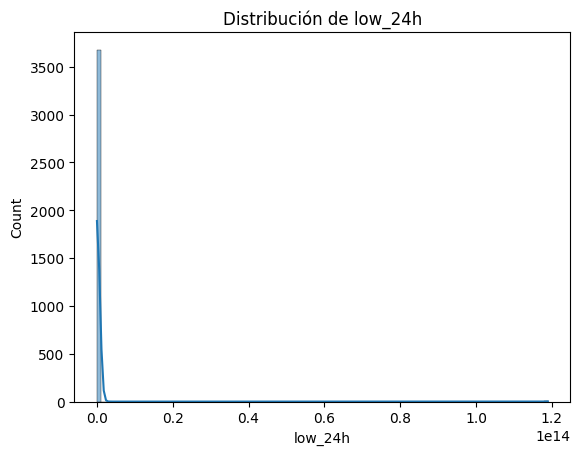

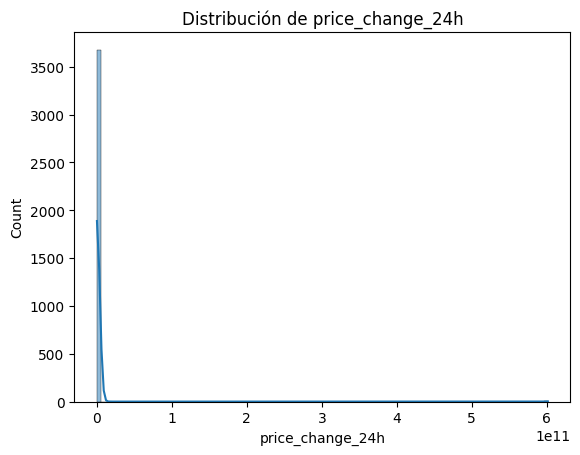

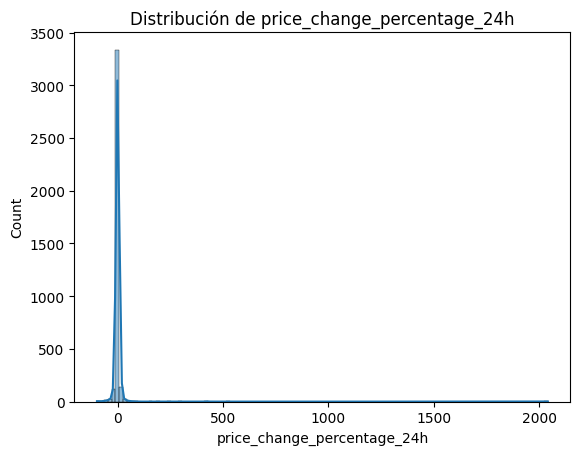

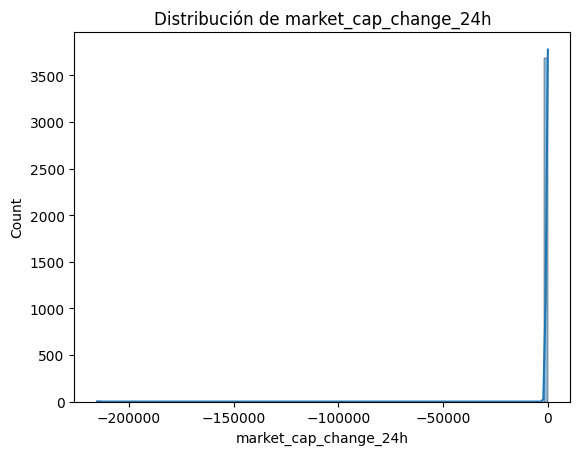

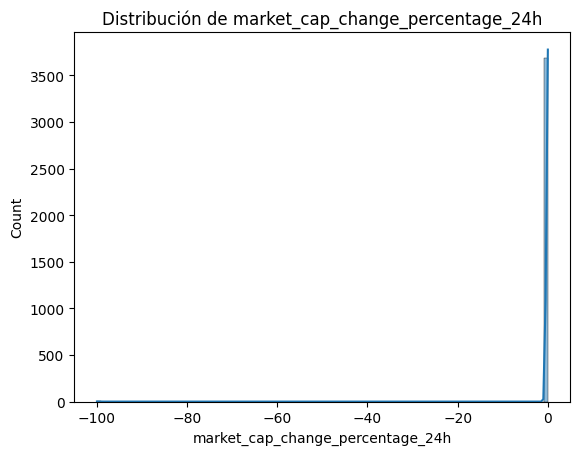

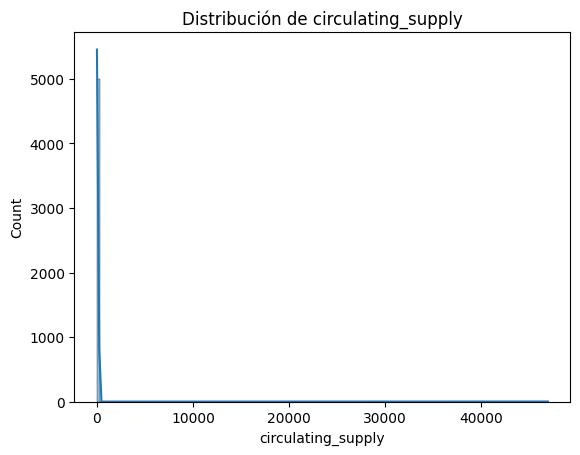

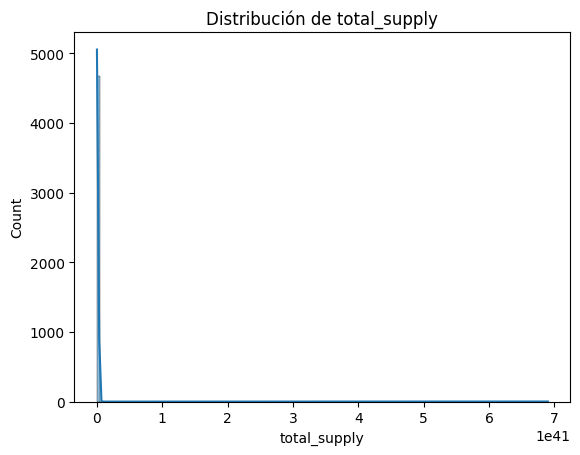

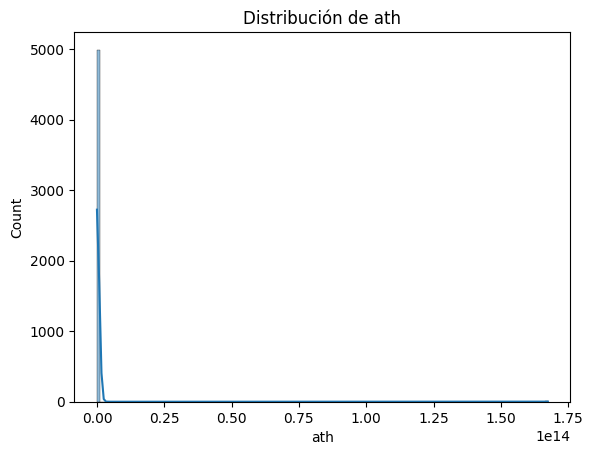

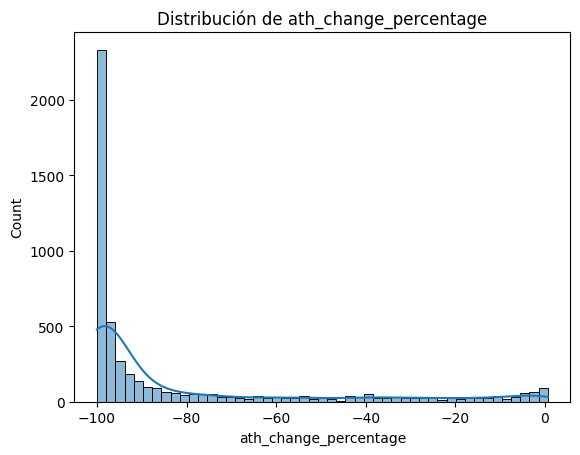

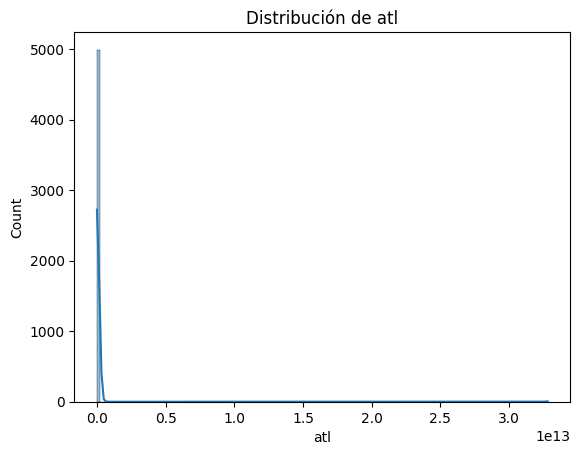

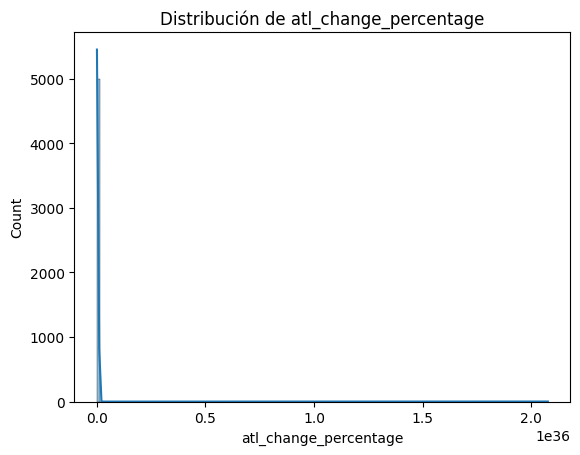

In [31]:
# Histograma simple
for col in cols_con_pocos_nulos:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

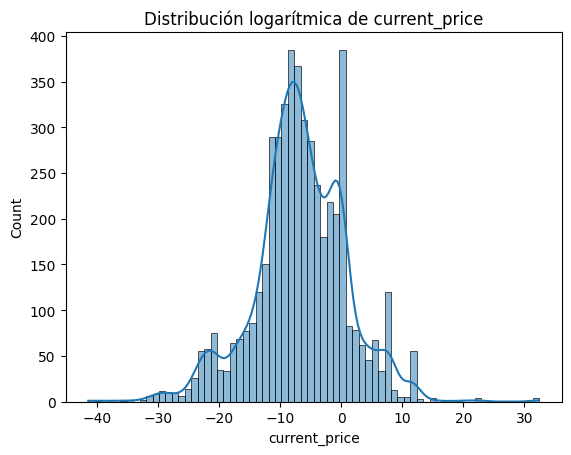

La columna market_cap no tiene suficientes valores positivos para aplicar log.


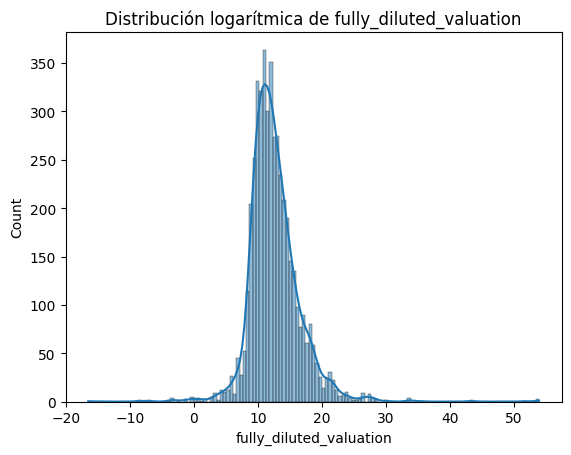

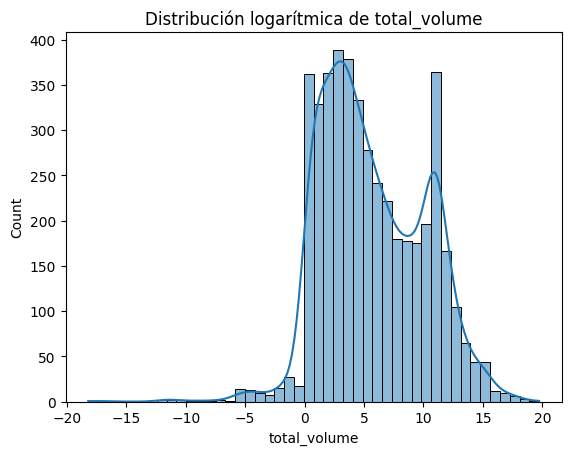

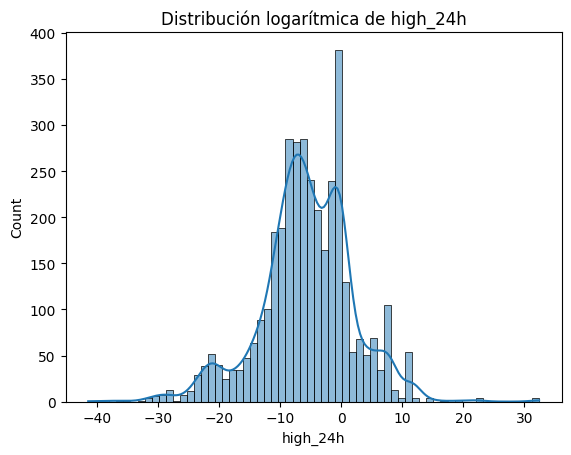

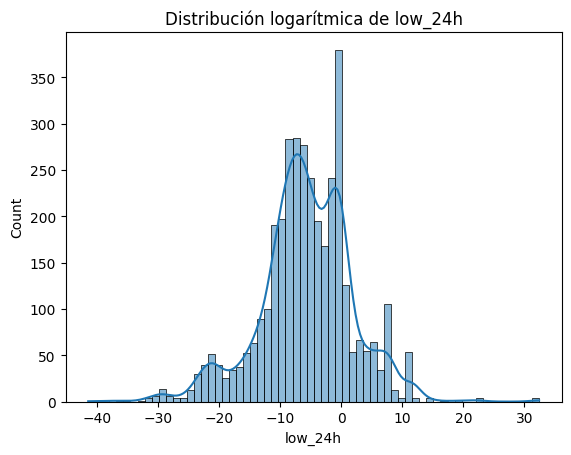

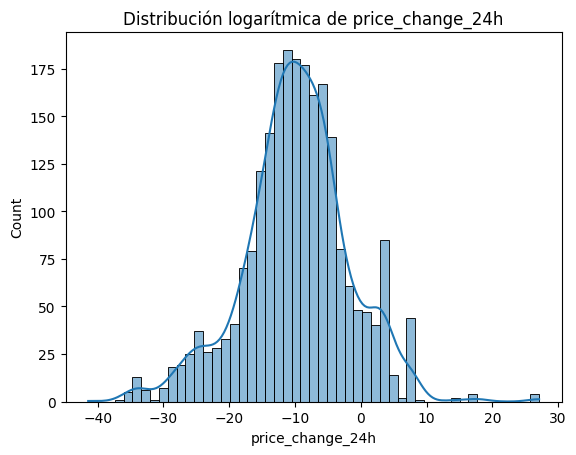

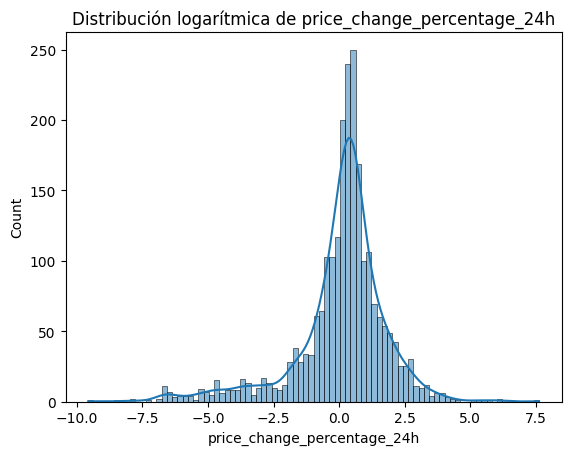

La columna market_cap_change_24h no tiene suficientes valores positivos para aplicar log.
La columna market_cap_change_percentage_24h no tiene suficientes valores positivos para aplicar log.


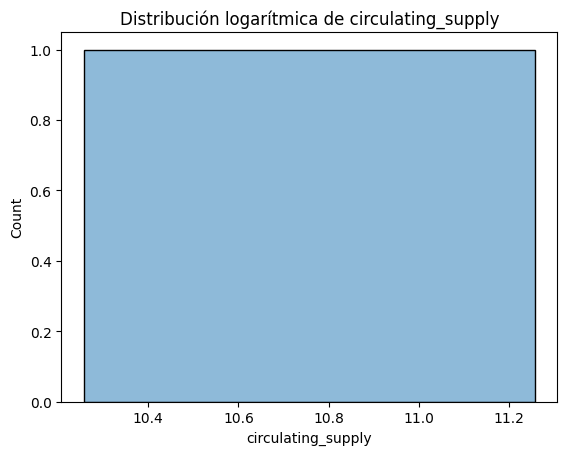

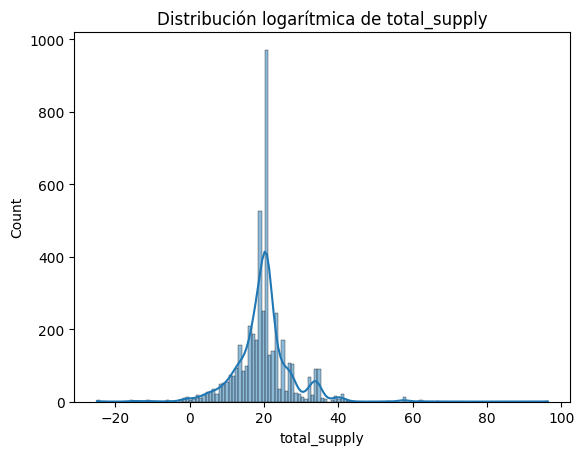

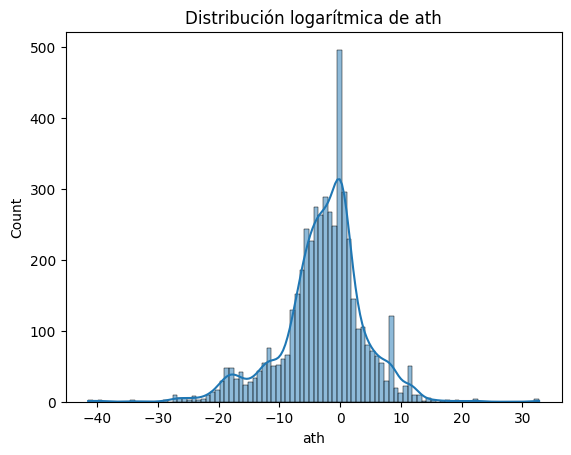

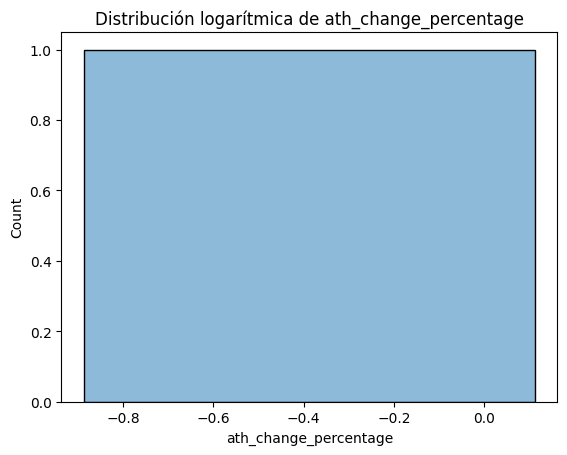

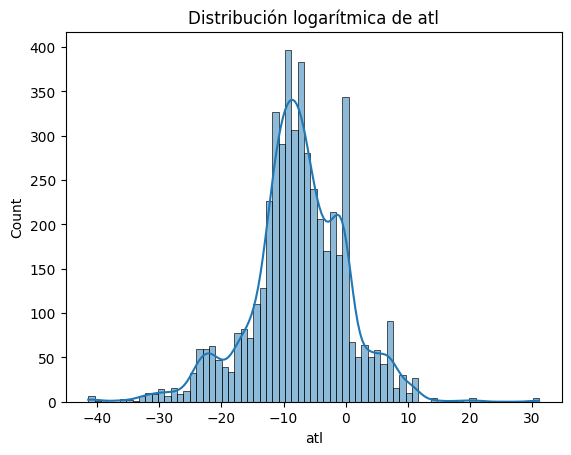

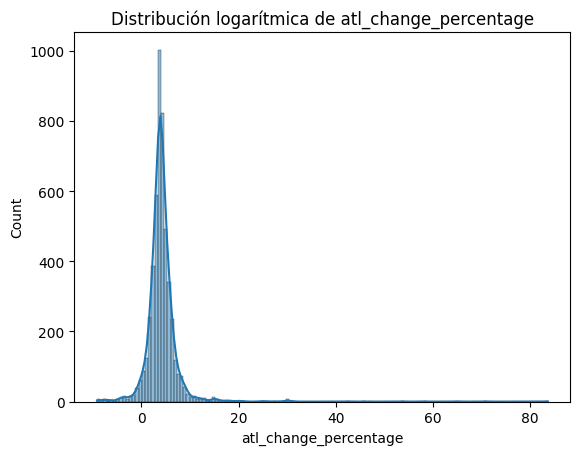

In [34]:
for col in cols_con_pocos_nulos:
    serie_limpia = df[col].dropna()
    serie_positiva = serie_limpia[serie_limpia > 0]

    if len(serie_positiva) > 0:
        plt.figure()
        sns.histplot(np.log(serie_positiva), kde=True)
        plt.title(f'Distribución logarítmica de {col}')
        plt.show()
    else:
        print(f"La columna {col} no tiene suficientes valores positivos para aplicar log.")

## 4️⃣ Select Data – Justificación de selección de columnas

In [35]:
# Ver columnas con más de 50% de nulos que podrías excluir
columnas_excluir = null_percent[null_percent > 50].index.tolist()
print("Columnas candidatas a excluir:", columnas_excluir)

Columnas candidatas a excluir: ['market_cap_rank', 'roi']


In [36]:
# Verifica si hay columnas irrelevantes (ej. URL de imagen)
irrelevantes = ['image', 'roi']
print("Otras columnas candidatas a excluir:", irrelevantes)

Otras columnas candidatas a excluir: ['image', 'roi']


In [37]:
# Agregamos max_supply manualmente por baja relevancia para el negocio
columnas_excluir.extend(['max_supply'])

# Asegurar que no se repitan
columnas_excluir = list(set(columnas_excluir + irrelevantes))
print("Columnas finales a excluir:", columnas_excluir)

Columnas finales a excluir: ['image', 'max_supply', 'market_cap_rank', 'roi']


Además de las columnas market_cap_rank y roi excluidas por su alta proporción de valores nulos, se decidió también excluir max_supply al no ser determinante para el objetivo del negocio. Esta variable representa el suministro máximo de tokens, pero dada su alta cantidad de valores faltantes (41%) y su limitada utilidad directa en la identificación de activos según narrativa y valorización, se descartó para este análisis.

## 🔄 Paso 5: Clean Data – Limpieza de datos

In [38]:
# Eliminar columnas irrelevantes o incompletas
df = df.drop(columns=columnas_excluir, errors='ignore')

In [39]:
# Imputar columnas numéricas con pocos nulos
cols_num = df.select_dtypes(include='number').columns
for col in cols_num:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

In [40]:
# Comprobar que no quedan nulos
print("Nulos restantes:", df.isna().sum().sort_values(ascending=False))

Nulos restantes: ath_date                            2
atl_date                            2
symbol                              1
current_price                       0
name                                0
id                                  0
fully_diluted_valuation             0
market_cap                          0
total_volume                        0
high_24h                            0
price_change_percentage_24h         0
market_cap_change_24h               0
low_24h                             0
price_change_24h                    0
circulating_supply                  0
market_cap_change_percentage_24h    0
ath                                 0
total_supply                        0
ath_change_percentage               0
atl                                 0
atl_change_percentage               0
last_updated                        0
dtype: int64


In [41]:
# Eliminar filas con nulos restantes
df = df.dropna()

In [42]:
# Verificar que no quede nada pendiente
print("Nulos finales:", df.isna().sum().sum())

Nulos finales: 0
